# Interactive plotting with [bokeh](https://docs.bokeh.org/en/latest/index.html)

Steven Pestana, November 2019

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import datetime as dt

***
#### Load some example data that we've used in class *(iButton air temperature)*
Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

In [2]:
# load the ibutton data
data = sio.loadmat('iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]
pd.plotting.register_matplotlib_converters()

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']
nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

***
# matplotlib

We can plot this with matplotlib, which most of you are very familiar with now

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Use matplotlib to plot a timseries for a couple sites to compare their air temperatures

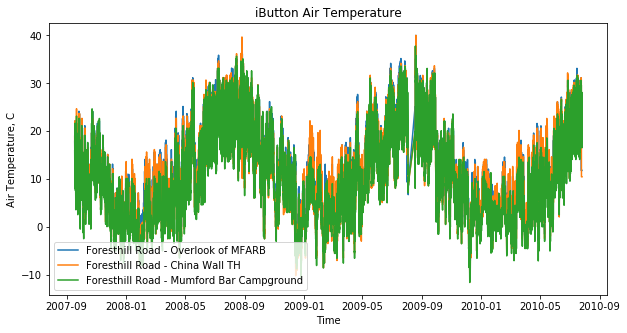

In [4]:
# create a figure and specify its size
plt.figure(figsize=(10,5))

# select and plot a few sites use the site name as its label
for site in range(3): 
    plt.plot(dates,AIR_TEMPERATURE[:,site],
             label=SITE_NAMES[site])

plt.legend(loc='lower left')                   # add a legend to the lower left of the figure
plt.ylabel('Air Temperature, C')               # set the label for the y axis
plt.xlabel('Time')                             # set the label for the x axis
plt.title('iButton Air Temperature');          # give our plot a title

It's hard to see what's going on in detail, so we'll set x and y axes limits to "zoom in" (and apply some formatting to the [legend](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html)).

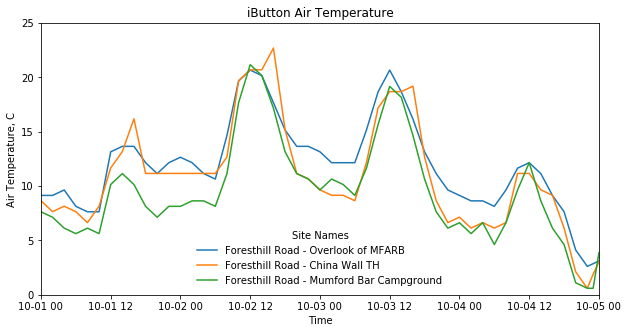

In [5]:
# create a figure and specify its size
plt.figure(figsize=(10,5))

# select and plot a few sites use the site name as its label
for site in range(3): 
    plt.plot(dates,AIR_TEMPERATURE[:,site],
             label=SITE_NAMES[site])

plt.legend(frameon=False,
           loc='lower center',
           labelspacing=0.5,
           title='Site Names')                 # add a legend and format
plt.ylabel('Air Temperature, C')               # set the label for the y axis
plt.xlabel('Time')                             # set the label for the x axis
plt.title('iButton Air Temperature');          # give our plot a title

# use xlim to set x axis limits to zoom in between two specific dates
plt.xlim(('2007-10-01', '2007-10-05')); 

# use ylim to set y axis limits to zoom in between two specific temperatures
plt.ylim((0,25)); 

Now we can see the daily temperature fluctuations at these three sites and how they compare.

***
# bokeh

We can also create an interactive plot with the bokeh library. This is especially useful for exploring your data quickly, but perhaps less useful for producing figures for posters or publication.

In [6]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category10

In [8]:
# output plot to notebook here
output_notebook()

# create a new plot with a title and axis labels
p = figure(title='iButton Air Temperature', 
           x_axis_label='Time', 
           y_axis_label='Air Temperature, C',
           height=400, width=650)

# select and plot a few sites use the site name as its label
for site in range(3): 
    p.line(dates,AIR_TEMPERATURE[:,site],
           legend_label=SITE_NAMES[site],
           line_width=2,
           line_color=Category10[3][site])

# show the results
show(p)

Loading BokehJS ...

***
***
## Visualization libraries/tools for python:

General and interactive plotting:
- [matplotlib](https://matplotlib.org/) large and well-supported plotting library
- [pandas + matplotlib](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) matplotlib plotting methods with pandas dataframes
- [seaborn](https://seaborn.pydata.org/) "statistical data visualization"
- [Bokeh](https://docs.bokeh.org/en/latest/index.html) and [Holoviews](http://holoviews.org/)/[hvPlot](https://hvplot.pyviz.org/) interactive plots in js/html
- [Vega](https://vega.github.io/) (developed by [UW IDL](https://idl.cs.washington.edu/))

Geospatial data plotting:
- [geopandas](http://geopandas.org/) geospatial data (good with point, line, polygon, vector data)
- [xarray](https://xarray.pydata.org/en/stable/plotting.html) for gridded data, timeseries, multi-dimensional arrays, NetCDF files ([climate data example](https://climate-cms.org/2018/04/27/xarray-plot-types.html))
- [rasterio](https://rasterio.readthedocs.io/en/stable/) for raster data (images or other gridded data)
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/) and [basemaps](https://matplotlib.org/basemap/) for maps
- [Geoviews](http://geoviews.org/) interactive maps and geospatial data




## Python data visualization tutorials:

*Start here* - Software Carpentry: [Plotting and Programming in Python](https://swcarpentry.github.io/python-novice-gapminder/)

*More detailed* - Python Data Science Handbook: [Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)

*Making maps* - Geohackweek: [Geospatial Data Visualization](https://geohackweek.github.io/visualization/)